<font size="20">Geocoding & Web Mapping with Python</font>

# Step 0) Setup
* To get started, we need to import all our packages.
* We also nee to paste our api key from https://account.mapbox.com/access-tokens/

In [1]:
import folium
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib notebook

import branca.colormap as cm
from geopy.geocoders import MapBox
api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2s4a285NTM1MDQwbDNocHozdXlkNzIyaSJ9.-_8gh9gG4VuprIPnmXBr3A"


# Step 1) Importing our data

* We'll use a Pandas to import three .csv files and load them as as a "DataFrames"
    * incident.csv contains postal code of the incident, province, municipality, along with the date and incident ID
    * victim.csv contains information on the victms including age, race, etc.
    * police.csv contaisn information about the police department and oficer involved
* Pandas .read_csv() has lots of funcionality that helps us import data
    * We can set the header, automatically interpet dates, an set our table indexes

In [2]:
Incident = pd.read_csv(
    'Data/incident.csv',
    delimiter = ',',
    header = 0,
    parse_dates=['date'],
    index_col=['id_incident']
)

Victim = pd.read_csv(
    'Data/victim.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)

Police = pd.read_csv(
    'Data/police.csv',
    delimiter = ',',
    header = 0, 
    index_col=['id_incident']
)

# Step 2) Joining all our data

* The three files share the same index "id_incident"
    * We can use this unique identifier to combine all our files into one.
* Then we can set the date as the index.

In [3]:
Police_Killings = Incident.join(Victim).join(Police).reset_index().set_index('date',drop = False)
print(Police_Killings.columns)

Police_Killings.head()

Index(['id_incident', 'date', 'day_week', 'prov', 'city_town', 'postal_code',
       'location_type', 'id_victim', 'Name', 'age', 'gender', 'race',
       'ethnic_ancestry', 'immigrant_refugee_naturalized', 'armed_type',
       'cause_death', 'taser_deployed', 'injured_officer', 'excited_delirium',
       'mentral_distress_disorder', 'substance_abuse', 'summary', 'Department',
       'charge_type', 'Charges', 'Officers Involved'],
      dtype='object')


,id_incident,date,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,...,taser_deployed,injured_officer,excited_delirium,mentral_distress_disorder,substance_abuse,summary,Department,charge_type,Charges,Officers Involved
date,,,,,,,,,,,,,,,,,,,,,
2012-01-06,1,2012-01-06,Fri,QC,Montreal,H3B 4W5,Urban,0001-V1,*****,34.0,...,No,Yes,No,Yes,Yes,Farshad Mohammadi was carrying a knife when he...,Service de police de la Ville de Montreal,None,No,0001-P1
2012-01-11,2,2012-01-11,Wed,AB,Onoway,T0E 1V0,Rural,0002-V1,*****,49.0,...,No,No,No,Unknown,Yes,RCMP called to an apartment complex in respons...,RCMP,None,No,0002-P1
2012-01-12,3,2012-01-12,Thu,ON,Oakville,L6H 0G6,Urban,0003-V1,*****,43.0,...,No,No,No,Unknown,Unknown,Kyle Newman intentionally and repeatedly struc...,Halton Regional Police Service,None,No,0003-P1
2012-02-03,4,2012-02-03,Fri,ON,Toronto,M4C 1X5,Urban,0004-V1,*****,29.0,...,No,No,No,Yes,No,"Michael Eligon, who had been involuntarily com...",Toronto Police Service,None,No,0004-P1
2012-02-13,5,2012-02-13,Mon,ON,Hamilton,L8K 5J4,Urban,0005-V1,*****,27.0,...,No,No,No,Yes,Unknown,"Police had a stolen van under surveillance, an...",Hamilton Police Service,None,No,0005-P1


# Step 3) Exploring the data

* Pandas has special funcitons

* We can quickly calculate statiscis like averages or resampleby a specific interval (e.g. Yearly) 
* We can use matplotlib.pyplot (plt) to display our information

Mean Victim Age:  36.73186813186813



<IPython.core.display.Javascript object>


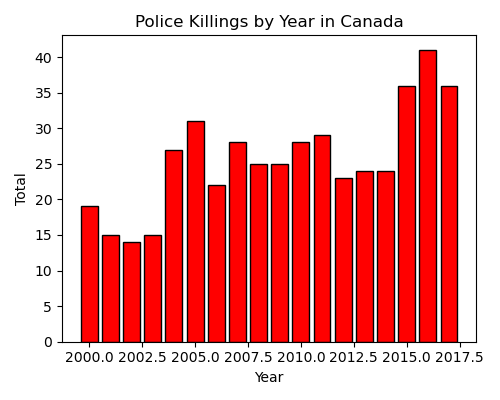

In [4]:
print('Mean Victim Age: ', Police_Killings['age'].mean())
print()

Yearly = Police_Killings.resample('Y').count()
plt.figure(figsize=(5,4))
plt.bar(Yearly.index.year,Yearly['id_incident'],color='#FF0000',edgecolor='black')
plt.title('Police Killings by Year in Canada')
plt.xlabel('Year')
plt.ylabel('Total')
plt.tight_layout()

### We can also groupby to conduct specific querries

<IPython.core.display.Javascript object>


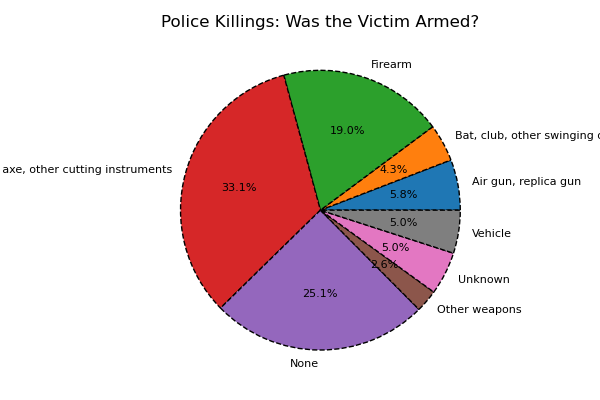

In [5]:

plt.figure(figsize=(6,4))
Armed = Police_Killings.groupby(['armed_type']).count()
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()


### Lets make these categories easier to interpret
* We can create a dictionary define the replacements we want to make
* We can use some of pandas special functions to query and manipulate our data
    * The .loc[] fucntion allows us to search for records
    * The .repalce() fnuction lets us replace values

<IPython.core.display.Javascript object>


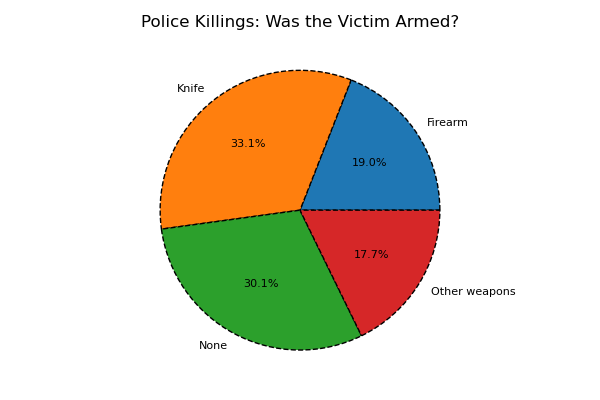

In [6]:
replace_dict = {
    'Air gun, replica gun':'Other weapons',
    'Bat, club, other swinging object':'Other weapons',
    'Vehicle':'Other weapons',
    'Knife, axe, other cutting instruments':'Knife',
    'Unknown':'None'
          }
for r in replace_dict.keys():
    Police_Killings.loc[Police_Killings['armed_type']==r,'armed_type']=replace_dict[r]
        
        
# Just making the same pic graph again
plt.figure(figsize=(6,4))
Armed = Police_Killings.groupby(['armed_type']).count()
plt.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
plt.title('Police Killings: Was the Victim Armed?')
plt.tight_layout()

### We can also make multiple plots together

<IPython.core.display.Javascript object>


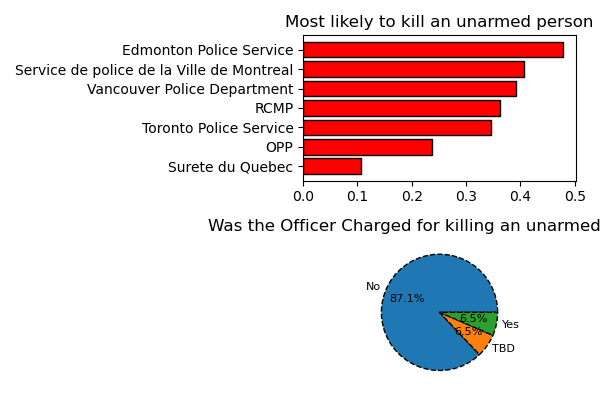

In [66]:
fig,ax= plt.subplots(2,1,figsize=(6,4))

Force = Police_Killings.groupby(['Department','armed_type']).count()['id_victim']#.sort_values(ascending=True)

Force=Force.unstack()
col = Force.columns
Force['Total']=Force.sum(axis=1)
for c in col:
    Force[c] /= Force['Total']

Force = Force.sort_values(by='Total',ascending=False)#
# print(Force)
Force = Force.loc[Force['Total']>20,'None'].sort_values()

# Force = Police_Killings.groupby('Department').count()['id_victim'].sort_values(ascending=True)
ax[0].barh(Force.index,Force.values,facecolor='#FF0000',edgecolor='black')
ax[0].set_title('Most likely to kill an unarmed person')


Charges = Police_Killings.loc[Police_Killings['armed_type']=='None'].groupby('Charges').count()
ax[1].pie(
    Charges['id_victim'],
    labels=Charges.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
ax[1].set_title('Was the Officer Charged for killing an unarmed person?')


plt.tight_layout()

### To look at the racial data, we need to normalize first
* Canada is predominately white, we have to scale each group by the size of their population to calcualte a police killing rate
    * We want calculate the Police Killing Rate per Milion Residents per Year for white, black, and indigenous people.
    * What should we use as the scale factor?
        * Hint the dataset spans the years 2000 to 2017
    

<IPython.core.display.Javascript object>


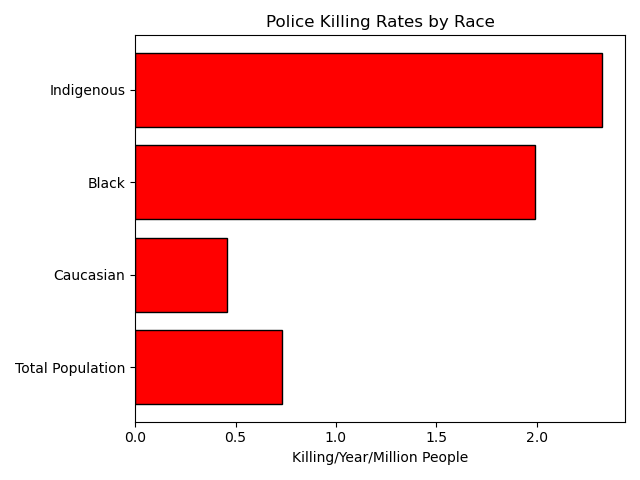

(18,)


In [67]:
Race=['Total Population','Caucasian','Black','Indigenous']
Population=[35151728,25803368,1198545,1673780]

scale = 1e6/18

Count = Police_Killings.groupby('race')['id_incident'].count()

plt.figure()

i=0
for race,population in (zip(Race,Population)):
    if race == 'Total Population':
        rate=((Count.sum()/population)*scale)
    else:
        rate=((Count[race]/population)*1e6/18)
    plt.barh(i,rate,color='#FF0000',edgecolor='black')
    i += 1
plt.yticks([0,1,2,3],Race)
plt.title('Police Killing Rates by Race')
plt.xlabel('Killing/Year/Million People')
plt.tight_layout()
    
print(Police_Killings.index.year.unique().shape)#.count())

# Step 4) Geocoding & Webmap Examples

* Geocoding is a method of getting the x,y (latitude and longitude) coordinates for an entity based on a text description.
    * geopy has multiple geocoder options.  You can use googel, bing, open streetmaps, etc.
    * We're using Mapbox becsue we get up to 15,000 free geocodes per month!
        * Make sure you've entered your API key at the top of the notebook

In [71]:
geolocator = MapBox(api_key=api_key)

# Lets try a simple example first!  Type any address here and see what comes up!
Test_Point = geolocator.geocode("2710 Fraser St")

print(Test_Point)
print(Test_Point.latitude,Test_Point.longitude)

2710 Fraser Street, Vancouver, British Columbia V5T 2H7, Canada
49.260438 -123.088896


## It returns our full home address and we can print our lattitude and longitude

## Lets make a webmap, centered on t headdress, displaying it as a blue dot

* We'll use a pacakge called Follium:
    * First we'll crate a Map, we'll call it Map.
    * We'll set the location with our home lattitude and longitude, and set some other paramters.
* Then we'll add our Test_Point using a CircleMarker.
* The last step is to "call" the map, so it will display below

In [72]:
Map = folium.Map(
    location=[Test_Point.latitude,Test_Point.longitude],
    zoom_start=11,
    tiles='Stamen Terrain'
)

point=folium.CircleMarker(
        location=[Test_Point.latitude,Test_Point.longitude],
        radius=10,
        popup='Home!',
        fill_opacity = 1,
        fill=True,
        color='black',
        line_weight=.35,
        fill_color='blue'
)

point.add_to(Map)

Map

## We've just created an interactive map.  Pretty cool right!?
* You can zoom and pan.  Click on your home and see what happens!

## This is handy, but what if we have multiple points to plot?
* It could get pretty cumbersome to create a bunch of circle markers.

* We can create a function to handle the details for us, and make it repeatable:
    * "def" defines our function "plot_point()", which takes five "arguments":
        * Map: The map you're working with
        * X: lattitude
        * Y: longitude
        * Popup_Text: What do we want the popup to say?
        * Color: What colour do we want?
* Everything else will remain the same for every point, so we can set them and leave them as is.
* We run the CircleMarker() function and add it to the map with one statement.

In [73]:
def plot_point(Map,X,Y,Popup_Text,Color):
    folium.CircleMarker(
        location=[X,Y],
        radius=5,
        popup=Popup_Text,
        fill_opacity = .75,
        fill=True,
        color='black',
        line_weight=.15,
        fill_color=Color
    ).add_to(Map)

## Lets explore the idea of geocoding a bit more!

* Geocoding requires specific information, otherwise, you may "confuse" the service

* Surrey or Victoria are well known cities in BC, but if you search for them withouth specifying "BC", you'll end up with the bigger, more populous cities that share their name

In [77]:
ExampleMap = folium.Map(
    location=[0,0],
    zoom_start=2,
    tiles='Stamen Terrain'
)

Surrey = geolocator.geocode('Surrey')
plot_point(ExampleMap,Surrey.latitude,Surrey.longitude,'Surrey, UK','green')

SurreyBC = geolocator.geocode('Surrey, BC')
plot_point(ExampleMap,SurreyBC.latitude,SurreyBC.longitude,'Surrey, BC','yellow')

Victoria = geolocator.geocode('Victoria')
plot_point(ExampleMap,Victoria.latitude,Victoria.longitude,'Victoria, AU','blue')

VictoriaBC = geolocator.geocode('Victoria, BC')
plot_point(ExampleMap,VictoriaBC.latitude,VictoriaBC.longitude,'Victoria, BC','orange')

ExampleMap

# Step 5) Geocode the Police Violence Dataset?

* This dataset has zipcodes, which are is a very specific identifier
    * We'll serach for each incident using the following search:
        * City + Zipccoe + Provicne
    * Some of our requests may fail! So we can try again with the city and province if so.
        * Try statements allow us to test if something works and skip the error if it doesn't.
        * If the City + Zipcode + Province request fails, maybe the zipcode had a typo?  We'll try just City + Province
        * If this fails too, we'll leave it blank and say the geocoding failed.

In [ ]:
Police_Killings['latitude'] = np.nan
Police_Killings['longitude'] = np.nan
Police_Killings['geocoding_Notes'] = ''
# i = 1
# for postal_code,race in zip(Police_Killings['postal_code'],Police_Killings['race']):
success = True
for index, row in Police_Killings.iterrows():
#     if i <3:
    try:
        g = geolocator.geocode(row['city_town']+' '+row['postal_code']+' '+ row['prov'])
        Police_Killings.loc[Police_Killings['postal_code']==row['postal_code'],
                    ['latitude','longitude']]=g.latitude,g.longitude
    except:
        try:
            g = geolocator.geocode(row['city_town']+' '+row['prov'])
            Police_Killings.loc[Police_Killings['postal_code']==row['postal_code'],
                        ['latitude','longitude','geocoding_Notes']]=g.latitude,g.longitude,'Just City'
            
        except:
            Police_Killings.loc[Police_Killings['postal_code']==row['postal_code'],
                        'geocoding_Notes']='Geocoding Failed'
            success = False
            pass
        pass
print('Geocoding Done')

# Lets make a webmap now

In [ ]:
# # location = geolocator.geocode(Incident.iloc[1])
color_Scheme = {
    'Caucasian':'#fafafa',
    'Unknown':'#b8b8b8',
    'Indigenous':'#121212',
    'Black':'#121212',
    'Asian':'#595959',
    'South Asian':'#595959',
    'Other':'#595959',
    'Arab':'#595959',
    'Latin American':'#595959',
}
CanadaMap = folium.Map(
    location=[55,-91.5],
    zoom_start=4,
    tiles='Stamen Terrain'
)

    
for index, row in Police_Killings.iterrows():
    if row['geocoding_Notes'] != 'Geocoding Failed':
        plot_point(Map=CanadaMap,
                   X=row['latitude'],
                   Y=row['longitude'],
                   Popup_Text=row['race']+' '+ row['gender'] + ' '+ str(row['age'])\
                     + ' '+ row['city_town'] + ' '+ row['prov']+ ' '+ row['postal_code'],
                   Color=color_Scheme[row['race']]
                  )

CanadaMap

# One of the records shows up in Massachusets.  This is obviously and issue.  Lets investigate a bit to try and see why?

* Its a typo.  Search this zipcode on the canada post webpage:https://www.canadapost.ca/cpo/mc/personal/postalcode/fpc.jsf
* It doesn't exist.  Say maybe its: V1T 7A3 instead?

In [ ]:

g = geolocator.geocode('V1T 7A3')
Police_Killings.loc[Police_Killings['postal_code']=='V1T 7Z3',
                    ['postal_code','latitude','longitude']]='V1T 7A3',g.latitude,g.longitude

# Step 6) Putting it all toghether

In [ ]:

# Provincial_Data = Provincial_Data.to_crs('epsg:4326')
# Provincial_Data.to_file("Data/Provincial_Police_Violence.json", driver = "GeoJSON")


CanadaMap2 = folium.Map(
    location=[60,-91.5],
    zoom_start=3,
    tiles='Stamen Terrain'
)


step = cm.StepColormap(
    ['gray', 'blue', 'purple', 'red'],
    vmin=0, vmax=10,
    index=[0,.5, 1, 3, 10],
    caption='Police Killings per Milliona Residents per Year'
)
    
    
folium.GeoJson(
    'Data/Provincial_Police_Violence.json',
    style_function=lambda feature:{'fillColor': step(feature['properties']['PKR']),
                                   'fillOpacity':1,
                                   'color': 'black',
                                   'line_weight':.1
                                  },
    tooltip=folium.features.GeoJsonTooltip(
            fields=['prov','PKR','PKDI_Class'],
            aliases=['Province','Police Killings per Million Residents per Year','Discrimination Index'],                              
        ),
    name='Police Killing Rate'
).add_to(CanadaMap2)


for index, row in Police_Killings.iterrows():
    if row['geocoding_Notes'] != 'Geocoding Failed':
        plot_point(Map=CanadaMap2,
                   X=row['latitude'],
                   Y=row['longitude'],
                   Popup_Text=row['race']+' '+ row['gender'] + ' '+ str(row['age'])\
                     + ' '+ row['city_town'] + ' '+ row['prov']+ ' '+ row['postal_code'],
                   Color='gray'
                  )

CanadaMap2.add_child(step)

folium.LayerControl().add_to(CanadaMap2)
CanadaMap2

# Lets save our Map & Data 

* We can embed the saved .html file in a webpage if we want.
* We can work with the police killing data now without having to geocode it again (remember our requests are limited)

In [ ]:
CanadaMap2.save('PoliceViolenceIncidents.html')
Police_Killings.to_csv('Data/PoliceKillings.csv')

# To Do
* Add second chloropleth leayer?

* Add more text to popus

* Better color scheme for dots?

* Output html graph too?